In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import random

In [6]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [7]:
football_data = pd.read_csv(r'/Users/krzysztof/Desktop/results.csv')
ranking_data = pd.read_csv(r'/Users/krzysztof/Downloads/fifa_ranking-2023-07-20.csv')
world_Cup_Champions = pd.read_csv(r'/Users/krzysztof/Desktop/sztuczna/world_cup.csv')

In [8]:
football_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46442 entries, 0 to 46441
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        46442 non-null  object
 1   home_team   46442 non-null  object
 2   away_team   46442 non-null  object
 3   home_score  46442 non-null  int64 
 4   away_score  46442 non-null  int64 
 5   tournament  46442 non-null  object
 6   city        46442 non-null  object
 7   country     46442 non-null  object
 8   neutral     46442 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.9+ MB


In [9]:
ranking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64757 entries, 0 to 64756
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             64757 non-null  int64  
 1   country_full     64757 non-null  object 
 2   country_abrv     64757 non-null  object 
 3   total_points     64757 non-null  float64
 4   previous_points  64757 non-null  float64
 5   rank_change      64757 non-null  int64  
 6   confederation    64757 non-null  object 
 7   rank_date        64757 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 4.0+ MB


In [10]:
world_Cup_Champions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           22 non-null     int64 
 1   Host           22 non-null     object
 2   Teams          22 non-null     int64 
 3   Champion       22 non-null     object
 4   Runner-Up      22 non-null     object
 5   TopScorrer     22 non-null     object
 6   Attendance     22 non-null     int64 
 7   AttendanceAvg  22 non-null     int64 
 8   Matches        22 non-null     int64 
dtypes: int64(5), object(4)
memory usage: 1.7+ KB


In [11]:
football_data.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [12]:
ranking_data.isnull().sum()

rank               0
country_full       0
country_abrv       0
total_points       0
previous_points    0
rank_change        0
confederation      0
rank_date          0
dtype: int64

In [13]:
world_Cup_Champions.isnull().sum()

Year             0
Host             0
Teams            0
Champion         0
Runner-Up        0
TopScorrer       0
Attendance       0
AttendanceAvg    0
Matches          0
dtype: int64

In [14]:
def result(row):
    if row['home_score'] > row['away_score']:
        return 0
    elif row['home_score'] < row['away_score']:
        return 1
    else:
        return 2

In [15]:
ranking_data.describe()

,rank,total_points,previous_points,rank_change
count,64757.000000,64757.000000,64757.000000,64757.000000
mean,100.267353,452.553234,451.157389,0.003768
std,58.098304,416.973715,417.203622,5.630379
min,1.000000,1.000000,0.000000,-92.000000
25%,50.000000,91.000000,88.000000,-1.000000
50%,100.000000,355.000000,353.000000,0.000000
75%,150.000000,657.000000,656.000000,2.000000
max,211.000000,2172.000000,2187.000000,199.000000


In [16]:
football_data.describe()

,home_score,away_score
count,46442.000000,46442.000000
mean,1.752444,1.183519
std,1.765016,1.399127
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [17]:
football_data['winner'] = football_data.apply(result, axis=1)

In [18]:
football_data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,2
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,0
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,0
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,2
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,0


In [19]:
football_data.drop('city', axis=1, inplace=True)

In [20]:
football_data.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,winner
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False,2
1,1873-03-08,England,Scotland,4,2,Friendly,England,False,0
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,False,0
3,1875-03-06,England,Scotland,2,2,Friendly,England,False,2
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,False,0


In [21]:
football_data.drop('country', axis=1, inplace=True)

In [22]:
football_data.head()

,date,home_team,away_team,home_score,away_score,tournament,neutral,winner
0,1872-11-30,Scotland,England,0,0,Friendly,False,2
1,1873-03-08,England,Scotland,4,2,Friendly,False,0
2,1874-03-07,Scotland,England,2,1,Friendly,False,0
3,1875-03-06,England,Scotland,2,2,Friendly,False,2
4,1876-03-04,Scotland,England,3,0,Friendly,False,0


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [24]:
ranking_data['rank_date'] = pd.to_datetime(ranking_data['rank_date'])
football_data['date'] = pd.to_datetime(football_data['date'])
ranking_data = ranking_data[ranking_data['rank_date'].dt.year >= 2008]
football_data = football_data[football_data['date'].dt.year >= 2008]

In [25]:
with open(r'/Users/krzysztof/Downloads/home_streak.txt') as file:
    lines_home_streak = [int(line.strip()) for line in file]

In [26]:
with open(r'/Users/krzysztof/Downloads/away_streak.txt') as file:
    lines_away_streak = [int(line.strip()) for line in file]

In [27]:
with open(r'/Users/krzysztof/Downloads/home.txt') as file:
    lines_home_value = [int(line.strip()) for line in file]

In [28]:
with open(r'/Users/krzysztof/Downloads/away.txt') as file:
    lines_away_value = [int(line.strip()) for line in file]

In [29]:
football_data['home_streak'] = lines_home_streak

In [30]:
football_data['away_streak'] = lines_away_streak

In [31]:
football_data['home_value'] = lines_home_value

In [32]:
football_data['away_value'] = lines_away_value

In [33]:
football_data

,date,home_team,away_team,home_score,away_score,tournament,neutral,winner,home_streak,away_streak,home_value,away_value
31127,2008-01-02,Kuwait,Lebanon,3,2,Friendly,False,0,1,0,0,0
31128,2008-01-05,Egypt,Namibia,3,0,Friendly,False,0,1,0,4150000,0
31129,2008-01-06,Tunisia,Zambia,1,2,Friendly,False,1,0,1,16750000,850000
31130,2008-01-08,Tunisia,Zambia,1,0,Friendly,False,0,1,1,16750000,850000
31131,2008-01-09,Nigeria,Sudan,2,0,Friendly,True,0,1,0,119350000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
46437,2024-03-26,Scotland,Northern Ireland,0,1,Friendly,False,1,3,3,328405000,25825000
46438,2024-03-26,Senegal,Benin,1,0,Friendly,True,0,8,0,288225000,8500000
46439,2024-03-26,Slovenia,Portugal,2,0,Friendly,False,0,7,9,106200000,1793525000
46440,2024-03-26,Spain,Brazil,3,3,Friendly,False,2,7,4,3095675000,2524725000


In [34]:
ranking_data.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
31085,11,Greece,GRE,1114.0,1114.0,0,UEFA,2008-01-16
31086,7,France,FRA,1243.0,1243.0,0,UEFA,2008-01-16
31087,6,Czech Republic,CZE,1290.0,1290.0,0,UEFA,2008-01-16
31088,9,Netherlands,NED,1170.0,1170.0,0,UEFA,2008-01-16
31089,10,Croatia,CRO,1129.0,1129.0,0,UEFA,2008-01-16


In [35]:
football_data.tail()

,date,home_team,away_team,home_score,away_score,tournament,neutral,winner,home_streak,away_streak,home_value,away_value
46437,2024-03-26,Scotland,Northern Ireland,0,1,Friendly,False,1,3,3,328405000,25825000
46438,2024-03-26,Senegal,Benin,1,0,Friendly,True,0,8,0,288225000,8500000
46439,2024-03-26,Slovenia,Portugal,2,0,Friendly,False,0,7,9,106200000,1793525000
46440,2024-03-26,Spain,Brazil,3,3,Friendly,False,2,7,4,3095675000,2524725000
46441,2024-03-26,Finland,Estonia,2,1,Friendly,False,0,6,0,13225000,2000000


In [36]:
rank_dict = {(row['rank_date'].to_period('M'), row['country_full']): row['rank'] for _, row in ranking_data.iterrows()}

In [37]:
def get_rank_home(row):
    date = row['date'].to_period('M')
    home_team = row['home_team']
    return rank_dict.get((date, home_team))

# Zoptymalizowana funkcja get_rank_away
def get_rank_away(row):
    date = row['date'].to_period('M')
    away_team = row['away_team']
    return rank_dict.get((date, away_team))

In [38]:
football_data['rank_home'] = football_data.apply(get_rank_home, axis=1)
football_data['rank_away'] = football_data.apply(get_rank_away, axis=1)

In [39]:
football_data.tail()

,date,home_team,away_team,home_score,away_score,tournament,neutral,winner,home_streak,away_streak,home_value,away_value,rank_home,rank_away
46437,2024-03-26,Scotland,Northern Ireland,0,1,Friendly,False,1,3,3,328405000,25825000,NaN,NaN
46438,2024-03-26,Senegal,Benin,1,0,Friendly,True,0,8,0,288225000,8500000,NaN,NaN
46439,2024-03-26,Slovenia,Portugal,2,0,Friendly,False,0,7,9,106200000,1793525000,NaN,NaN
46440,2024-03-26,Spain,Brazil,3,3,Friendly,False,2,7,4,3095675000,2524725000,NaN,NaN
46441,2024-03-26,Finland,Estonia,2,1,Friendly,False,0,6,0,13225000,2000000,NaN,NaN


In [40]:
teams_Champions = {}

In [41]:
for i in range(len(world_Cup_Champions)):
    champion_name = world_Cup_Champions.iloc[i]["Champion"]
    if champion_name not in teams_Champions:
        teams_Champions[champion_name] = 1
    else:
        teams_Champions[champion_name] += 1

In [42]:
teams_Runners_Up = {}

In [43]:
for i in range(len(world_Cup_Champions)):
    Runner_Up_name = world_Cup_Champions.iloc[i]["Runner-Up"]
    if Runner_Up_name not in teams_Runners_Up:
        teams_Runners_Up[Runner_Up_name] = 1
    else:
        teams_Runners_Up[Runner_Up_name] += 1

In [44]:
teams_Champions

{'Argentina': 3,
 'France': 2,
 'Germany': 2,
 'Spain': 1,
 'Italy': 4,
 'Brazil': 5,
 'West Germany': 2,
 'England': 1,
 'Uruguay': 2}

In [45]:
teams_Runners_Up

{'France': 2,
 'Croatia': 1,
 'Argentina': 3,
 'Netherlands': 3,
 'Germany': 1,
 'Brazil': 2,
 'Italy': 2,
 'West Germany': 3,
 'Czechoslovakia': 2,
 'Sweden': 1,
 'Hungary': 2}

In [46]:
def champion_home(row):
    home = row["home_team"]
    if home not in teams_Champions:
        return 0
    else:
        return teams_Champions[home]

def champion_away(row):
    away = row["away_team"]
    if away not in teams_Champions:
        return 0
    else:
        return teams_Champions[away]
football_data['homeWCChampinship'] = football_data.apply(champion_home, axis=1)
football_data['awayWCChampinship'] = football_data.apply(champion_away, axis=1)

In [47]:
football_data

,date,home_team,away_team,home_score,away_score,tournament,neutral,winner,home_streak,away_streak,home_value,away_value,rank_home,rank_away,homeWCChampinship,awayWCChampinship
31127,2008-01-02,Kuwait,Lebanon,3,2,Friendly,False,0,1,0,0,0,115.0,133.0,0,0
31128,2008-01-05,Egypt,Namibia,3,0,Friendly,False,0,1,0,4150000,0,35.0,119.0,0,0
31129,2008-01-06,Tunisia,Zambia,1,2,Friendly,False,1,0,1,16750000,850000,46.0,67.0,0,0
31130,2008-01-08,Tunisia,Zambia,1,0,Friendly,False,0,1,1,16750000,850000,46.0,67.0,0,0
31131,2008-01-09,Nigeria,Sudan,2,0,Friendly,True,0,1,0,119350000,0,19.0,94.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46437,2024-03-26,Scotland,Northern Ireland,0,1,Friendly,False,1,3,3,328405000,25825000,NaN,NaN,0,0
46438,2024-03-26,Senegal,Benin,1,0,Friendly,True,0,8,0,288225000,8500000,NaN,NaN,0,0
46439,2024-03-26,Slovenia,Portugal,2,0,Friendly,False,0,7,9,106200000,1793525000,NaN,NaN,0,0
46440,2024-03-26,Spain,Brazil,3,3,Friendly,False,2,7,4,3095675000,2524725000,NaN,NaN,1,5


In [48]:
football_data.dropna(inplace=True)

In [49]:
def runner_up_home(row):
    if row["home_team"] not in teams_Runners_Up:
        return 0
    else:
        return teams_Runners_Up["home_team"]

def runner_up_away(row):
    if row["away_team"] not in teams_Runners_Up:
        return 0
    else:
        return teams_Runners_Up["away_team"]
football_data['homeWCRunnerUp'] = football_data.apply(champion_home, axis=1)
football_data['awayWCRunnerUp'] = football_data.apply(champion_away, axis=1)

In [50]:
football_data.dropna(inplace=True)

In [51]:
football_data

,date,home_team,away_team,home_score,away_score,tournament,neutral,winner,home_streak,away_streak,home_value,away_value,rank_home,rank_away,homeWCChampinship,awayWCChampinship,homeWCRunnerUp,awayWCRunnerUp
31127,2008-01-02,Kuwait,Lebanon,3,2,Friendly,False,0,1,0,0,0,115.0,133.0,0,0,0,0
31128,2008-01-05,Egypt,Namibia,3,0,Friendly,False,0,1,0,4150000,0,35.0,119.0,0,0,0,0
31129,2008-01-06,Tunisia,Zambia,1,2,Friendly,False,1,0,1,16750000,850000,46.0,67.0,0,0,0,0
31130,2008-01-08,Tunisia,Zambia,1,0,Friendly,False,0,1,1,16750000,850000,46.0,67.0,0,0,0,0
31131,2008-01-09,Nigeria,Sudan,2,0,Friendly,True,0,1,0,119350000,0,19.0,94.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45573,2023-07-08,Panama,Qatar,4,0,Gold Cup,True,0,5,3,5100000,0,45.0,59.0,0,0,0,0
45574,2023-07-08,Mexico,Costa Rica,2,0,Gold Cup,True,0,5,2,148250000,13925000,12.0,46.0,0,0,0,0
45575,2023-07-09,Guatemala,Jamaica,0,1,Gold Cup,True,1,5,3,0,89100000,107.0,58.0,0,0,0,0
45599,2023-07-12,Jamaica,Mexico,0,3,Gold Cup,True,1,3,6,89100000,148250000,58.0,12.0,0,0,0,0


In [52]:
def tournament_weight(row):
    if row['tournament'] == "Friendly":
        return 0
    elif row['tournament'] == "FIFA World Cup":
        return 3
    elif "qualification" in row['tournament']:
        return 1
    else:
        return 2
football_data['tournamentWeight'] = football_data.apply(tournament_weight, axis=1)

In [53]:
football_data.dropna(inplace=True)

In [54]:
columns_to_drop = ['date','home_team', 'away_team', 'tournament','home_score','away_score']
football_data = football_data.drop(columns=columns_to_drop, errors='ignore')

In [55]:
football_data.tail()

,neutral,winner,home_streak,away_streak,home_value,away_value,rank_home,rank_away,homeWCChampinship,awayWCChampinship,homeWCRunnerUp,awayWCRunnerUp,tournamentWeight
45573,True,0,5,3,5100000,0,45.0,59.0,0,0,0,0,2
45574,True,0,5,2,148250000,13925000,12.0,46.0,0,0,0,0,2
45575,True,1,5,3,0,89100000,107.0,58.0,0,0,0,0,2
45599,True,1,3,6,89100000,148250000,58.0,12.0,0,0,0,0,2
45609,True,0,7,5,148250000,5100000,12.0,45.0,0,0,0,0,2


In [56]:
football_data.dropna(inplace=True)

In [57]:
football_data.isnull().sum()

neutral              0
winner               0
home_streak          0
away_streak          0
home_value           0
away_value           0
rank_home            0
rank_away            0
homeWCChampinship    0
awayWCChampinship    0
homeWCRunnerUp       0
awayWCRunnerUp       0
tournamentWeight     0
dtype: int64

In [58]:
football_data

,neutral,winner,home_streak,away_streak,home_value,away_value,rank_home,rank_away,homeWCChampinship,awayWCChampinship,homeWCRunnerUp,awayWCRunnerUp,tournamentWeight
31127,False,0,1,0,0,0,115.0,133.0,0,0,0,0,0
31128,False,0,1,0,4150000,0,35.0,119.0,0,0,0,0,0
31129,False,1,0,1,16750000,850000,46.0,67.0,0,0,0,0,0
31130,False,0,1,1,16750000,850000,46.0,67.0,0,0,0,0,0
31131,True,0,1,0,119350000,0,19.0,94.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45573,True,0,5,3,5100000,0,45.0,59.0,0,0,0,0,2
45574,True,0,5,2,148250000,13925000,12.0,46.0,0,0,0,0,2
45575,True,1,5,3,0,89100000,107.0,58.0,0,0,0,0,2
45599,True,1,3,6,89100000,148250000,58.0,12.0,0,0,0,0,2


In [59]:
y = football_data.pop('winner')
X = football_data

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
def calculate_recall(y_true, y_pred):
    true_positives = 0
    false_negatives = 0

    for true_label, pred_label in zip(y_true, y_pred):
        if true_label == 0:
            if pred_label == true_label:
                true_positives += 1
            else:
                false_negatives += 1

    if true_positives + false_negatives == 0:
        return 0

    recall = true_positives / (true_positives + false_negatives)
    return recall
def calculate_precision(y_true, y_pred):
    true_positives = 0
    false_positives = 0

    for true_label, pred_label in zip(y_true, y_pred):
        if pred_label == 0:
            if pred_label == true_label:
                true_positives += 1
            else:
                false_positives += 1

    if true_positives + false_positives == 0:
        return 0  

    precision = true_positives / (true_positives + false_positives)
    return precision

In [62]:
def calculate_accuracy(y_true, y_pred):
    #corrected =sum(y_pred == y_true)
    corrected = 0
    for i in range(len(y_pred)):
        if y_pred[i] == y_true.iloc[i]:
            corrected+=1
    return corrected/len(y_true)
class KNN:
    def __init__(self, k=3):
        self.k=k
    def fit(self, x, y):
        self.x_train = x
        self.y_train = y

    def predict(self, x_test):
        predictions = []
        for x in x_test.values:

            distances=[np.linalg.norm(x-x1) for x1 in self.x_train.values]

            indices=np.argsort(distances)[:self.k]

            labels=[self.y_train.iloc[i] for i in indices]
            common=max(set(labels), key=labels.count)
            predictions.append(common)
        return predictions #tablica wynikow

In [63]:
results = []
resultsPrecision = []
resultsRecall = []
for i in range(100,401,100):
    knnTest = KNN(i)
    knnTest.fit(X_train, y_train)
    y_pred_test = knnTest.predict(X_test)
    result = calculate_accuracy(y_test, y_pred_test)
    results.append(result)
    recall = calculate_recall(y_test, y_pred_test)
    resultsRecall.append(recall)
    precision = calculate_precision(y_test, y_pred_test)
    resultsPrecision.append(precision)

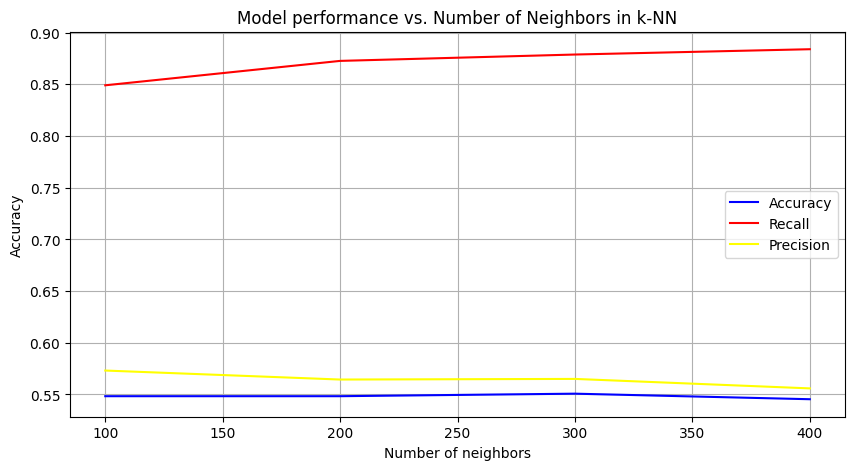

In [64]:
arguments = [i for i in range(100,401,100)]
plt.figure(figsize=(10, 5))
plt.plot(arguments, results, label = 'Accuracy', color = 'blue')
plt.plot(arguments, resultsRecall, label = 'Recall', color = 'red')
plt.plot(arguments, resultsPrecision, label = 'Precision', color = 'yellow')
plt.title('Model performance vs. Number of Neighbors in k-NN')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [65]:
results

[0.5482926829268293,
 0.5482926829268293,
 0.5507317073170732,
 0.5453658536585366]

In [66]:
index = np.argmax(results)
resultKNN = results[index]

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [68]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred2 = tree.predict(X_test)
resultTree = calculate_accuracy(y_test, y_pred2)
print("Accuracy: " + str(resultTree))
recallTree = calculate_recall(y_test, y_pred2)
print("Recall: " + str(recallTree))
precisionTree = calculate_precision(y_test, y_pred2)
print("Precision: " + str(precisionTree))

Accuracy: 0.5097560975609756
Recall: 0.6211498973305954
Precision: 0.6477516059957173


In [69]:
class NB:
    def __init__(self):
        self.mean = {}
        self.std = {}
        self.class_priori = {}

    def fit(self, X_train, y_train):
        self.classes = y_train.unique()
        for cls in self.classes:
            X_cls = X_train[cls == y_train]
            self.mean[cls] = np.mean(X_cls, axis=0)
            self.std[cls] = np.std(X_cls, axis=0)
            self.class_priori[cls] = len(X_cls) / len(X_train)

    def predict(self, X_test):
        y_pred = []
        for itr in range(len(X_test)):
            prob = self.calculate_probability(X_test.iloc[itr])
            cls = max(prob, key=prob.get)
            y_pred.append(cls)
        return y_pred

    def calculate_probability(self, x):
        posteriors = {}
        for cls in self.classes:
            posterior_prob = 1  
            for i in range(len(x)):
                cond_prob = self.conditional_probability(x.iloc[i], self.mean[cls].iloc[i], self.std[cls].iloc[i])
                posterior_prob *= cond_prob  
            posteriors[cls] = posterior_prob * self.class_priori[cls]  
        return posteriors

    def conditional_probability(self, x, mean, std):
        exponent = np.exp(-((x - mean) ** 2) / (2 * std ** 2))
        return (1 / (np.sqrt(2 * np.pi) * std)) * exponent

In [70]:
nb = NB()
nb.fit(X_train, y_train)
y_pred_NB = nb.predict(X_test)
resultNB = calculate_accuracy(y_test, y_pred_NB)
print("Accuracy: " + str(resultNB))
recallNB = calculate_recall(y_test, y_pred_NB)
print("Recall: " + str(recallNB))
precisionNB = calculate_precision(y_test, y_pred_NB)
print("Precision: " + str(precisionNB))

Accuracy: 0.6063414634146341
Recall: 0.9209445585215605
Precision: 0.5991983967935872


In [71]:
knnText = 'KNN(' + str(arguments[index]) + ')' 

In [72]:
models = [knnText, 'Naive Bayes', 'Decision Tree']
accuracies = [resultKNN, resultNB, resultTree]

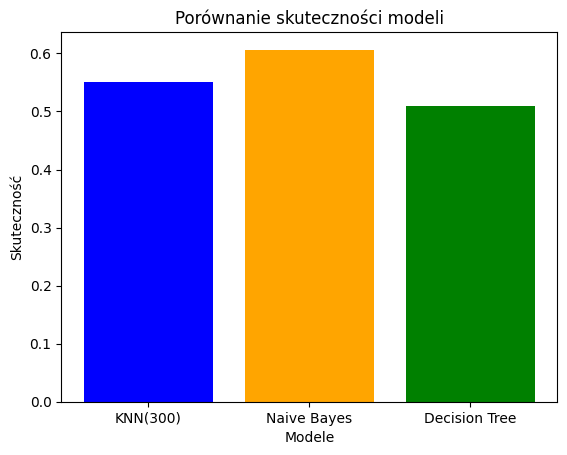

In [73]:
plt.bar(models, accuracies, color=['blue', 'orange', 'green'])
plt.title('Porównanie skuteczności modeli')
plt.xlabel('Modele')
plt.ylabel('Skuteczność')
plt.show()

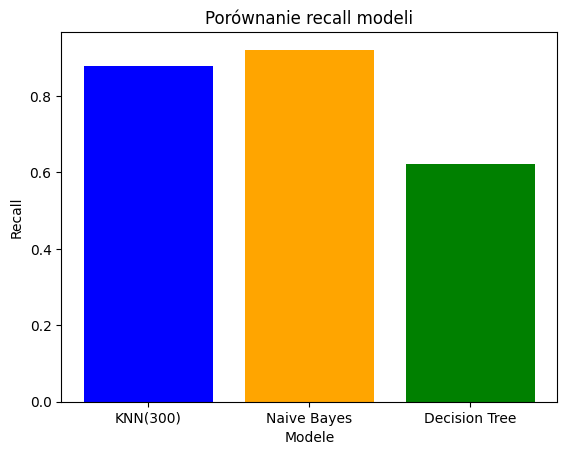

In [74]:
recallKNN = resultsRecall[index]
recalls = [recallKNN, recallNB, recallTree]
plt.bar(models, recalls, color=['blue', 'orange', 'green'])
plt.title('Porównanie recall modeli')
plt.xlabel('Modele')
plt.ylabel('Recall')
plt.show()

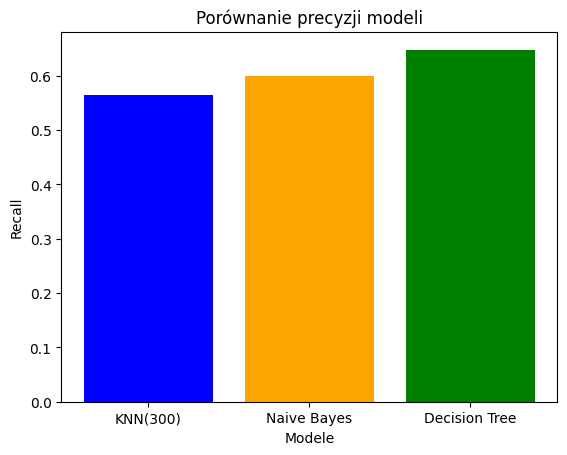

In [75]:
precisionKNN = resultsPrecision[index]
precisions = [precisionKNN, precisionNB, precisionTree]
plt.bar(models, precisions, color=['blue', 'orange', 'green'])
plt.title('Porównanie precyzji modeli')
plt.xlabel('Modele')
plt.ylabel('Recall')
plt.show()

In [76]:
def NormalizeData(x):
    for c in x.select_dtypes(include=[np.number]).columns:
        minV = x[c].min()
        maxV = x[c].max()

        if maxV != minV:
            x[c] = (x[c] - minV) / (maxV - minV)
        else:
            x[c] = 0 

NormalizeData(football_data)

In [77]:
X_norm = football_data

In [78]:
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y, test_size=0.2, random_state=42)

In [79]:
results = []
resultsPrecision = []
resultsRecall = []
for i in range(100,401,100):
    knnTest = KNN(i)
    knnTest.fit(X_train_norm, y_train_norm)
    y_pred_test = knnTest.predict(X_test_norm)
    result = calculate_accuracy(y_test_norm, y_pred_test)
    results.append(result)
    recall = calculate_recall(y_test_norm, y_pred_test)
    resultsRecall.append(recall)
    precision = calculate_precision(y_test_norm, y_pred_test)
    resultsPrecision.append(precision)

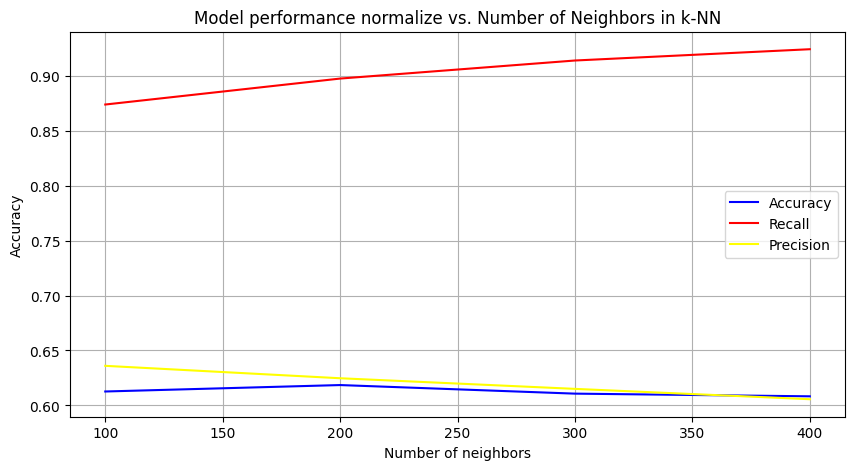

In [80]:
arguments = [i for i in range(100,401,100)]
plt.figure(figsize=(10, 5))
plt.plot(arguments, results, label = 'Accuracy', color = 'blue')
plt.plot(arguments, resultsRecall, label = 'Recall', color = 'red')
plt.plot(arguments, resultsPrecision, label = 'Precision', color = 'yellow')
plt.title('Model performance normalize vs. Number of Neighbors in k-NN')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [81]:
results

[0.6126829268292683,
 0.6185365853658537,
 0.6107317073170732,
 0.6082926829268293]

In [82]:
index = np.argmax(results)
resultKNNNorm = results[index]

In [83]:
resultKNNNorm

0.6185365853658537

In [84]:
tree_norm = DecisionTreeClassifier()
tree_norm.fit(X_train_norm, y_train_norm)
y_pred2_norm = tree_norm.predict(X_test_norm)
resultTreeNorm = calculate_accuracy(y_test, y_pred2_norm)
print("Accuracy normalize: " + str(resultTreeNorm))
recallTreeNorm = calculate_recall(y_test, y_pred2_norm)
print("Recall normalize: " + str(recallTreeNorm))
precisionTreeNorm = calculate_precision(y_test, y_pred2_norm)
print("Precision normalize: " + str(precisionTreeNorm))

Accuracy normalize: 0.5209756097560976
Recall normalize: 0.6365503080082136
Precision normalize: 0.6567796610169492


In [85]:
nbNorm = NB()
nbNorm.fit(X_train_norm, y_train_norm)
y_pred_NB_norm = nbNorm.predict(X_test_norm)
resultNBNorm = calculate_accuracy(y_test, y_pred_NB_norm)
print("Accuracy normalize: " + str(resultNBNorm))
recallNBNorm = calculate_recall(y_test, y_pred_NB_norm)
print("Recall normalize: " + str(recallNBNorm))
precisionNBNorm = calculate_precision(y_test, y_pred_NB_norm)
print("Precision normalize: " + str(precisionNBNorm))

Accuracy normalize: 0.6063414634146341
Recall normalize: 0.9209445585215605
Precision normalize: 0.5991983967935872


In [86]:
knnText = 'KNN(' + str(arguments[index]) + ')' 

In [87]:
models = [knnText, 'Naive Bayes', 'Decision Tree']
accuracies = [resultKNNNorm, resultNBNorm, resultTreeNorm]

In [88]:
accuracies

[0.6185365853658537, 0.6063414634146341, 0.5209756097560976]

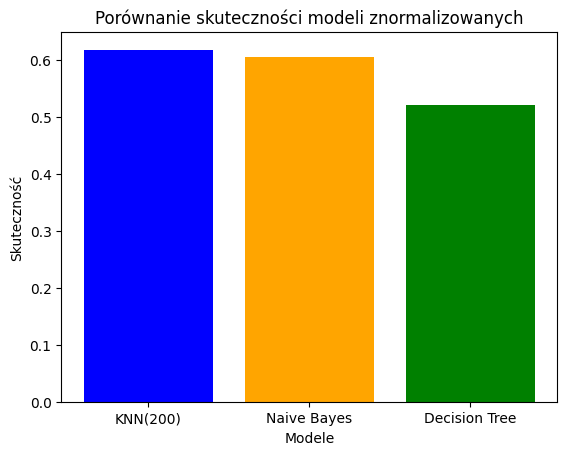

In [89]:
plt.bar(models, accuracies, color=['blue', 'orange', 'green'])
plt.title('Porównanie skuteczności modeli znormalizowanych')
plt.xlabel('Modele')
plt.ylabel('Skuteczność')
plt.show()

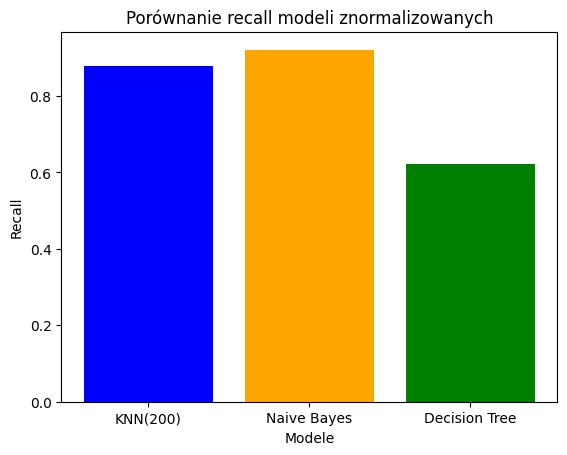

In [90]:
recallKNNNorm = resultsRecall[index]
recalls = [recallKNN, recallNB, recallTree]
plt.bar(models, recalls, color=['blue', 'orange', 'green'])
plt.title('Porównanie recall modeli znormalizowanych')
plt.xlabel('Modele')
plt.ylabel('Recall')
plt.show()

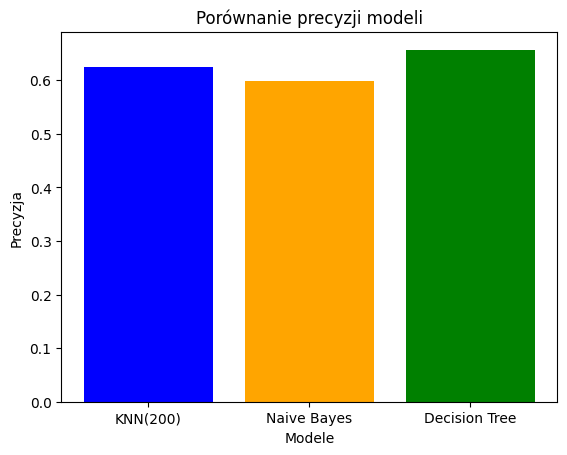

In [91]:
precisionKNNNorm = resultsPrecision[index]
precisions = [precisionKNNNorm, precisionNBNorm, precisionTreeNorm]
plt.bar(models, precisions, color=['blue', 'orange', 'green'])
plt.title('Porównanie precyzji modeli')
plt.xlabel('Modele')
plt.ylabel('Precyzja')
plt.show()

In [92]:
model = NB()
model.fit(X_train, y_train)

In [93]:
last_row = ranking_data.iloc[-1]
date_last_row = last_row['rank_date']

In [94]:
import pickle 

In [95]:
with open(r'/Users/krzysztof/Downloads/current_value.pkl', 'rb') as f:
    team_values = pickle.load(f)

In [96]:
with open(r'/Users/krzysztof/Downloads/current_streak.pkl', 'rb') as f:
    team_streak = pickle.load(f)

In [97]:
team_streak

{'Kuwait': 3,
 'Lebanon': 0,
 'Egypt': 4,
 'Namibia': 3,
 'Tunisia': 3,
 'Zambia': 3,
 'Nigeria': 5,
 'Sudan': 3,
 'Mali': 6,
 'Qatar': 8,
 'Iran': 8,
 'United Arab Emirates': 6,
 'China PR': 3,
 'Guinea': 6,
 'Ivory Coast': 6,
 'Morocco': 6,
 'Senegal': 8,
 'Angola': 4,
 'Barbados': 1,
 'Antigua and Barbuda': 2,
 'Costa Rica': 4,
 'Sweden': 5,
 'South Africa': 2,
 'Mozambique': 3,
 'Syria': 3,
 'Bahrain': 5,
 'Benin': 0,
 'Bermuda': 3,
 'Puerto Rico': 4,
 'Botswana': 3,
 'Dominica': 5,
 'Guadeloupe': 7,
 'United States': 6,
 'Ghana': 2,
 'Guyana': 6,
 'Grenada': 1,
 'Belize': 3,
 'El Salvador': 0,
 'Cameroon': 3,
 'Iraq': 7,
 'Jordan': 6,
 'Singapore': 3,
 'Yemen': 2,
 'Haiti': 3,
 'Japan': 8,
 'Chile': 3,
 'Trinidad and Tobago': 4,
 'Oman': 5,
 'Bosnia and Herzegovina': 2,
 'South Korea': 5,
 'Martinique': 5,
 'Canada': 4,
 'Saudi Arabia': 6,
 'Luxembourg': 5,
 'Belarus': 3,
 'Iceland': 5,
 'Malta': 2,
 'Armenia': 2,
 'Azerbaijan': 4,
 'Kazakhstan': 6,
 'Cayman Islands': 1,
 'Venezue

In [98]:
team_values

{'Kuwait': 0,
 'Lebanon': 0,
 'Egypt': 106000000,
 'Namibia': 0,
 'Tunisia': 54575000,
 'Zambia': 7950000,
 'Nigeria': 502850000,
 'Sudan': 0,
 'Mali': 210475000,
 'Qatar': 0,
 'Iran': 38900000,
 'United Arab Emirates': 0,
 'China PR': 0,
 'Guinea': 88000000,
 'Ivory Coast': 0,
 'Morocco': 477075000,
 'Senegal': 288225000,
 'Angola': 44950000,
 'Barbados': 0,
 'Antigua and Barbuda': 0,
 'Costa Rica': 15400000,
 'Sweden': 423675000,
 'South Africa': 18450000,
 'Mozambique': 21900000,
 'Syria': 16350000,
 'Bahrain': 0,
 'Benin': 8500000,
 'Bermuda': 0,
 'Puerto Rico': 0,
 'Botswana': 0,
 'Dominica': 0,
 'Guadeloupe': 16100000,
 'United States': 365850000,
 'Ghana': 273125000,
 'Guyana': 150000,
 'Grenada': 3975000,
 'Belize': 0,
 'El Salvador': 0,
 'Cameroon': 220050000,
 'Iraq': 2550000,
 'Jordan': 7000000,
 'Singapore': 0,
 'Yemen': 0,
 'Haiti': 9450000,
 'Japan': 370350000,
 'Chile': 45750000,
 'Trinidad and Tobago': 13200000,
 'Oman': 0,
 'Bosnia and Herzegovina': 0,
 'South Korea': 

In [99]:
def predict(neutral,home_team,away_team,tournament):
    rank_home = rank_dict.get((date_last_row.to_period('M'), home_team))
    rank_away = rank_dict.get((date_last_row.to_period('M'), away_team))
    weight = 2
    if tournament == "Friendly":
        weight = 0
    elif tournament == "FIFA World Cup":
        weight = 3
    elif "qualification" in tournament:
        weight = 1
    else:
        weight = 2
        
    if home_team in teams_Champions:
        championships_home = teams_Champions[home_team]
    else:
        championships_home = 0
    
    if away_team in teams_Champions:
        championships_away = teams_Champions[away_team]
    else:
        championships_away = 0
        
    if home_team in teams_Runners_Up:
        runners_Up_home = teams_Runners_Up[home_team]
    else:
        runners_Up_home = 0
        
    if away_team in teams_Runners_Up:
        runners_Up_away = teams_Runners_Up[away_team]
    else:
        runners_Up_away = 0  
        
    if home_team in team_streak:
        home_streak = team_streak[home_team]
    else:
        home_streak = 0
    
    if away_team in team_streak:
        away_streak = team_streak[away_team]
    else:
        away_streak = 0
        
    if home_team in team_values:
        home_value = team_values[home_team]
    else:
        home_value = 0
        
    if away_team in team_values:
        away_value = team_values[away_team]
    else:
        away_value = 0
    
    x = [neutral, home_streak, away_streak, home_value, away_value,rank_home, rank_away, championships_home, championships_away, runners_Up_home, runners_Up_away, weight]
    
    df = pd.DataFrame([x], columns=['neutral', 'home_streak','away_streak','home_value','away_value','rank_home', 'rank_away', 'homeWCChampionship', 'awayWCChampionship', 'homeWCRunnerUp', 'awayWCRunnerUp', 'tournamentWeight'])

    
    prediction = model.predict(df)
    
    if prediction[0] == 0:
        print(home_team)
    elif prediction[0] == 1:
        print(away_team)
    elif prediction[0] == 2:
        print("Draw")

In [100]:
def prediction():
    home_country = input("Podaj drużynę 1: ")
    away_country = input("Podaj drużynę 2: ")
    neutral = input("Czy mecz odbywał się na terenie neutralnym? ")
    if neutral == "tak":
        home = True
    else:
        home = False
    tournament = input("Podaj w ramach czego odbył się mecz: ")
    predict(home, home_country,away_country, tournament)

In [ ]:
prediction()